## k-NN

### without  kernel

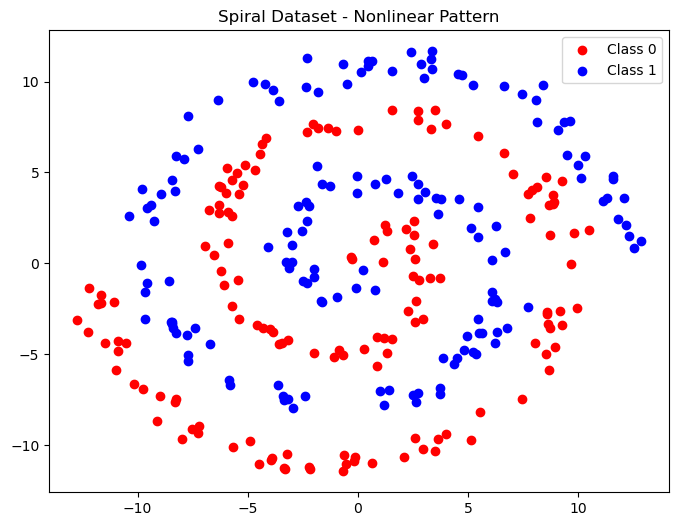

In [9]:
import numpy as np
import matplotlib.pyplot as plt

def generate_spiral(n_points, noise=0.2):
    n = np.sqrt(np.random.rand(n_points, 1)) * 720 * (2 * np.pi) / 360
    d1x = -np.cos(n) * n + np.random.randn(n_points, 1) * noise
    d1y = np.sin(n) * n + np.random.randn(n_points, 1) * noise

    X1 = np.hstack((d1x, d1y))
    y1 = np.zeros(n_points)

    d2x = np.cos(n) * n + np.random.randn(n_points, 1) * noise
    d2y = -np.sin(n) * n + np.random.randn(n_points, 1) * noise

    X2 = np.hstack((d2x, d2y))
    y2 = np.ones(n_points)

    X = np.vstack((X1, X2))
    y = np.hstack((y1, y2))

    return X, y

# 데이터 생성
np.random.seed(42)
X_spiral, y_spiral = generate_spiral(n_points=150, noise=0.5)

# 시각화
plt.figure(figsize=(8, 6))
plt.scatter(X_spiral[y_spiral == 0][:, 0], X_spiral[y_spiral == 0][:, 1], color='red', label='Class 0')
plt.scatter(X_spiral[y_spiral == 1][:, 0], X_spiral[y_spiral == 1][:, 1], color='blue', label='Class 1')
plt.title("Spiral Dataset - Nonlinear Pattern")
plt.legend()
plt.show()


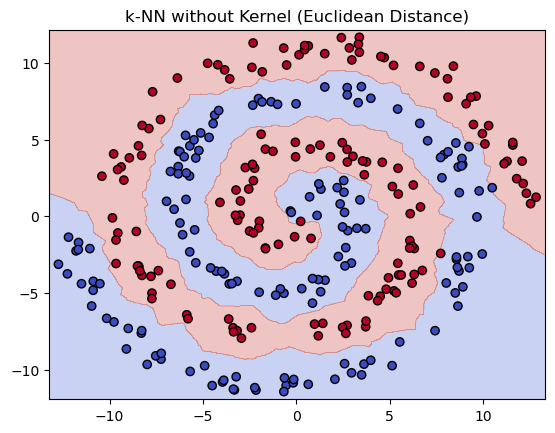

In [11]:
from sklearn.neighbors import KNeighborsClassifier

# 기본 k-NN 모델 정의
knn_basic = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
knn_basic.fit(X_spiral, y_spiral)

# 시각화 함수
def plot_decision_boundary(model, X, y, title):
    h = 0.02
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', edgecolor='k')
    plt.title(title)
    plt.show()

# 기본 k-NN 결과 시각화
plot_decision_boundary(knn_basic, X_spiral, y_spiral, "k-NN without Kernel (Euclidean Distance)")

### with kernel

In [13]:
from sklearn.metrics.pairwise import rbf_kernel

class KernelKNN:
    def __init__(self, n_neighbors=5, gamma=1.0):
        self.n_neighbors = n_neighbors
        self.gamma = gamma

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

    def predict(self, X):
        # RBF 커널 유사도 계산
        K = rbf_kernel(X, self.X_train, gamma=self.gamma)
        predictions = []

        for i in range(K.shape[0]):
            # 가장 유사한 k개의 인덱스 추출
            top_k_indices = np.argsort(K[i])[-self.n_neighbors:]
            top_k_labels = self.y_train[top_k_indices]
            # 다수결 투표
            pred = np.argmax(np.bincount(top_k_labels.astype(int)))
            predictions.append(pred)
        
        return np.array(predictions)

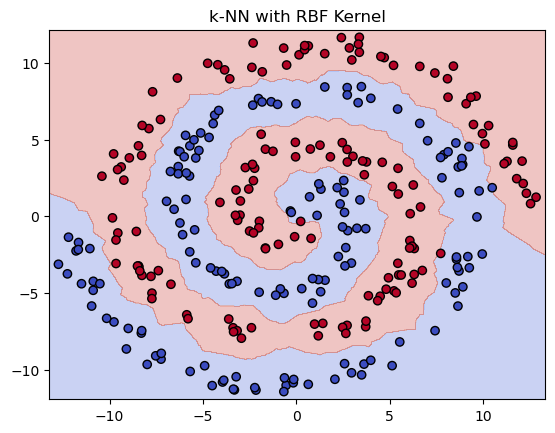

In [15]:
# 커널 k-NN 모델 정의
knn_rbf = KernelKNN(n_neighbors=5, gamma=1.0)
knn_rbf.fit(X_spiral, y_spiral)

# 예측
y_pred_rbf = knn_rbf.predict(X_spiral)

# 커널 k-NN 결과 시각화
plot_decision_boundary(knn_rbf, X_spiral, y_spiral, "k-NN with RBF Kernel")
 

## SVM

### without kernel

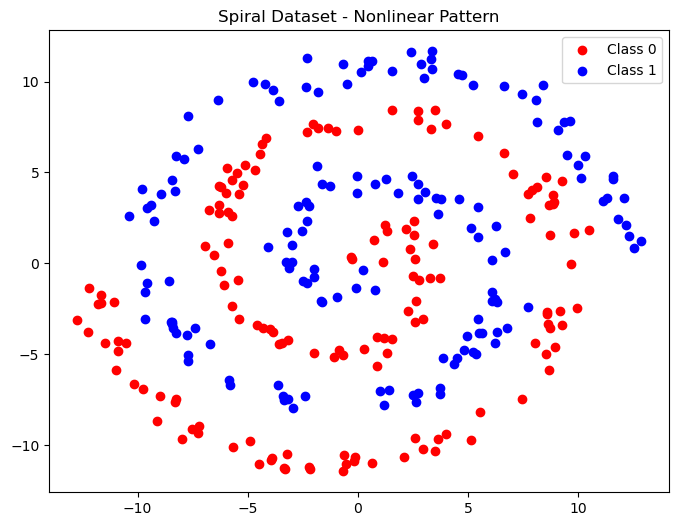

In [20]:
import numpy as np
import matplotlib.pyplot as plt

def generate_spiral(n_points, noise=0.5):
    n = np.sqrt(np.random.rand(n_points, 1)) * 720 * (2 * np.pi) / 360
    d1x = -np.cos(n) * n + np.random.randn(n_points, 1) * noise
    d1y = np.sin(n) * n + np.random.randn(n_points, 1) * noise
    X1 = np.hstack((d1x, d1y))
    y1 = np.zeros(n_points)

    d2x = np.cos(n) * n + np.random.randn(n_points, 1) * noise
    d2y = -np.sin(n) * n + np.random.randn(n_points, 1) * noise
    X2 = np.hstack((d2x, d2y))
    y2 = np.ones(n_points)

    X = np.vstack((X1, X2))
    y = np.hstack((y1, y2))

    return X, y

# 데이터셋 생성
np.random.seed(42)
X_spiral, y_spiral = generate_spiral(n_points=150, noise=0.5)

# 데이터 시각화
plt.figure(figsize=(8, 6))
plt.scatter(X_spiral[y_spiral == 0][:, 0], X_spiral[y_spiral == 0][:, 1], color='red', label='Class 0')
plt.scatter(X_spiral[y_spiral == 1][:, 0], X_spiral[y_spiral == 1][:, 1], color='blue', label='Class 1')
plt.title("Spiral Dataset - Nonlinear Pattern")
plt.legend()
plt.show()

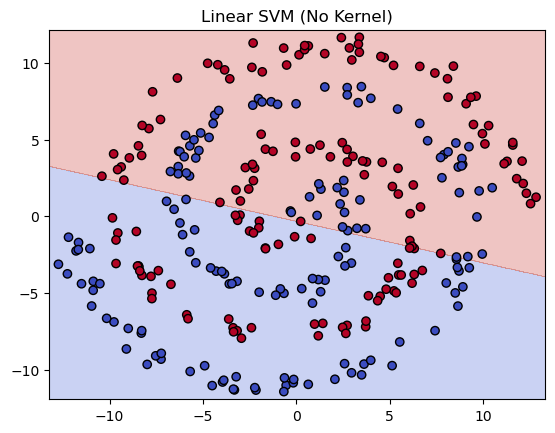

In [22]:
from sklearn.svm import SVC

# 선형 SVM 모델 학습
linear_svm = SVC(kernel='linear', C=1.0)
linear_svm.fit(X_spiral, y_spiral)

# 결정 경계 시각화 함수
def plot_decision_boundary(model, X, y, title):
    h = 0.02
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', edgecolor='k')
    plt.title(title)
    plt.show()

# 선형 SVM 결과 시각화
plot_decision_boundary(linear_svm, X_spiral, y_spiral, "Linear SVM (No Kernel)")


### with kernel

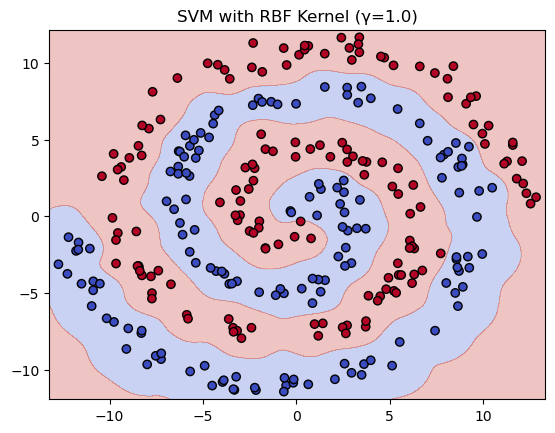

In [25]:
# RBF 커널 SVM 모델 학습
rbf_svm = SVC(kernel='rbf', gamma=1.0, C=1.0)
rbf_svm.fit(X_spiral, y_spiral)

# RBF 커널 SVM 결과 시각화
plot_decision_boundary(rbf_svm, X_spiral, y_spiral, "SVM with RBF Kernel (γ=1.0)")


### with polynomial kernel

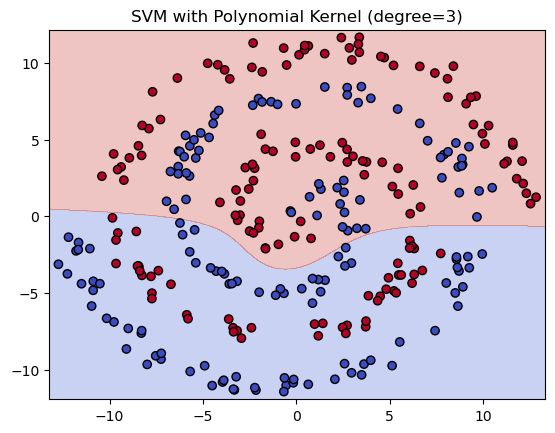

In [28]:
# 다항식 커널 SVM 모델 학습 (차수 = 3)
poly_svm = SVC(kernel='poly', degree=3, C=1.0)
poly_svm.fit(X_spiral, y_spiral)

# 다항식 커널 SVM 결과 시각화
plot_decision_boundary(poly_svm, X_spiral, y_spiral, "SVM with Polynomial Kernel (degree=3)")


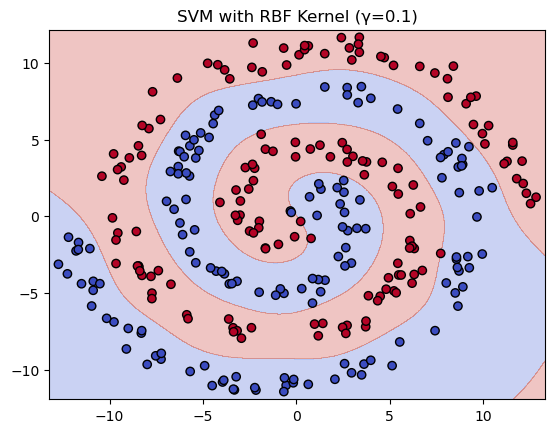

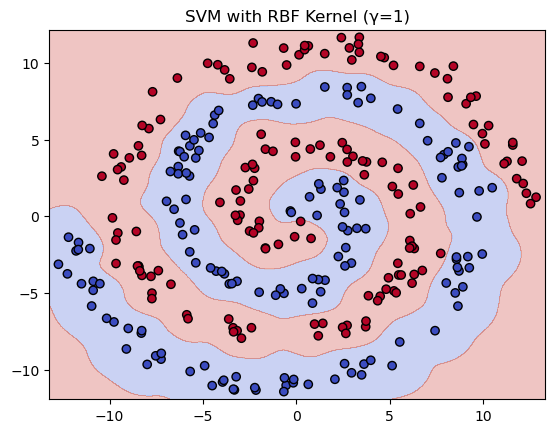

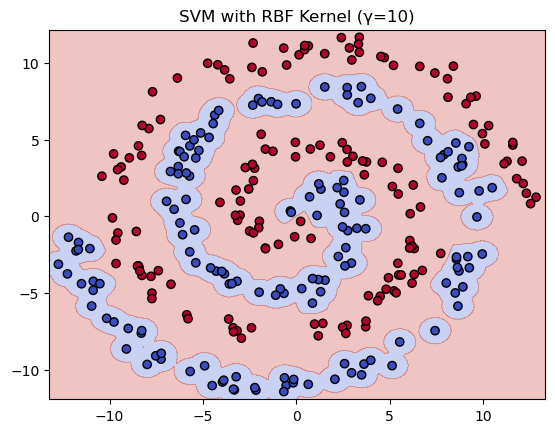

In [30]:
for gamma in [0.1, 1, 10]:
    rbf_svm = SVC(kernel='rbf', gamma=gamma, C=1.0)
    rbf_svm.fit(X_spiral, y_spiral)
    plot_decision_boundary(rbf_svm, X_spiral, y_spiral, f"SVM with RBF Kernel (γ={gamma})")
